 # **CREDIT CARD FRAUD DETECTION**

---
****

##Import Libraries

In [ ]:
# Loan Default Prediction
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from warnings import filterwarnings

## Load The Dataset

In [ ]:
# Load the data
df = pd.read_csv('/content/fraudTrain.csv')
dt = pd.read_csv('/content/fraudTest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


## Statistical Analysis About the Data

In [ ]:
df.shape

(19476, 23)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,19476.000000,1.947500e+04,19475.000000,19475.000000,19475.000000,19475.000000,1.947500e+04,1.947500e+04,19475.000000,19475.000000,19475.000000
mean,9737.500000,4.275559e+17,70.519926,48949.064852,38.499702,-90.362035,9.084999e+04,1.325880e+09,38.501656,-90.358590,0.006778
std,5622.381257,1.324022e+18,150.263839,27007.709723,5.140518,14.111404,3.028157e+05,2.885798e+05,5.166165,14.129925,0.082051
min,0.000000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.042510,-166.629875,0.000000
25%,4868.750000,1.800446e+14,9.630000,26041.000000,34.668900,-96.917700,7.440000e+02,1.325644e+09,34.753383,-97.038188,0.000000
50%,9737.500000,3.521417e+15,48.250000,48174.000000,39.303600,-87.591700,2.471000e+03,1.325897e+09,39.310831,-87.484562,0.000000
75%,14606.250000,4.653879e+15,83.075000,72042.000000,41.811400,-80.158000,2.112500e+04,1.326084e+09,41.881962,-80.189566,0.000000
max,19475.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326401e+09,66.645176,-66.967742,1.000000


In [ ]:
dt.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
df.info

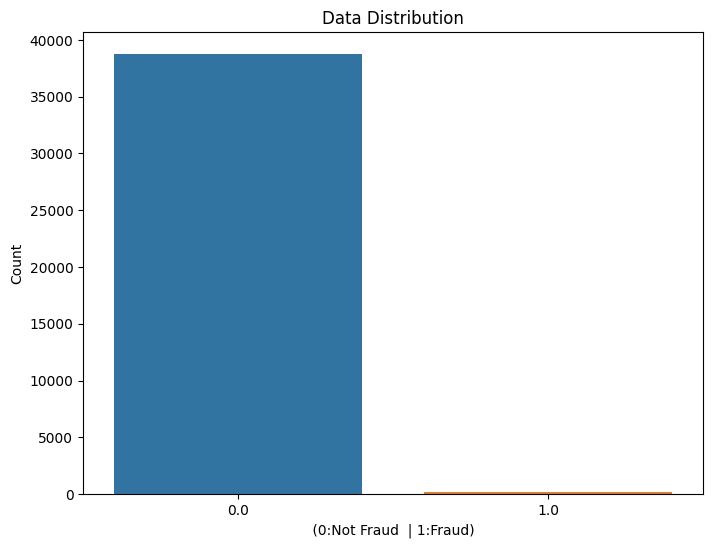

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=pd.concat([df, dt], ignore_index=True))
plt.title('Data Distribution')
plt.xlabel(' (0:Not Fraud  | 1:Fraud) ')
plt.ylabel('Count')
plt.show()

## Pre - Processing Data

### Checking for Null Values

In [ ]:
#Checking for null values
print(df.isnull().sum())
print(dt.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat            

In [ ]:
df = df.drop_duplicates()
dt = dt.drop_duplicates()
df = df.dropna()
dt = dt.dropna()

In [ ]:
cols_to_drop = ['Unnamed: 0','cc_num','merchant','first','last','trans_num','unix_time','street','category','trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','state']
df.drop(columns=cols_to_drop,inplace = True)
dt.drop(columns=cols_to_drop,inplace = True)

<ipython-input-139-b5c4908a1f37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cols_to_drop,inplace = True)
<ipython-input-139-b5c4908a1f37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.drop(columns=cols_to_drop,inplace = True)


In [ ]:
df.shape

(19475, 5)

In [ ]:
df.gender =[ 1 if value == "M" else 0 for value in df.gender]
dt.gender =[ 1 if value == "M" else 0 for value in dt.gender]

<ipython-input-141-3cf2feeb471c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender =[ 1 if value == "M" else 0 for value in df.gender]
<ipython-input-141-3cf2feeb471c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.gender =[ 1 if value == "M" else 0 for value in dt.gender]


In [ ]:
df.head()

,amt,gender,zip,city_pop,is_fraud
0,4.97,0,28654.0,3495.0,0.0
1,107.23,0,99160.0,149.0,0.0
2,220.11,1,83252.0,4154.0,0.0
3,45.00,1,59632.0,1939.0,0.0
4,41.96,1,24433.0,99.0,0.0


### Split the data into training and testing sets

In [ ]:
x_train = df.drop('is_fraud',axis=1)
x_test = dt.drop('is_fraud',axis=1)
y_train = df['is_fraud']
y_test = dt['is_fraud']

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### logistic Regression

In [ ]:
#Applying logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

#predicting the Results
y_pred = model.predict(x_test)

#Confusion matrix
confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 99.51


### Support Vector Machine

In [ ]:
# Support Vector Machine classification
svm_model = SVC(max_iter=1000)

svm_model.fit(x_train,y_train)

svm_y_pred = svm_model.predict(x_test)

svm_cm = confusion_matrix(y_test, svm_y_pred)

accuracy=accuracy_score(y_test, svm_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of the model is 99.64


### Random Forest

In [ ]:
# Random Forest classification
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

rf_y_pred = rf_model.predict(x_test)

# Compute the confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
accuracy=accuracy_score(y_test, rf_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 99.57


### Gradient Descent

In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)

# Predict the labels for the test data
gb_y_pred = gb_model.predict(x_test)

# Compute the confusion matrix for Gradient Boosting
gb_cm = confusion_matrix(y_test, gb_y_pred)

accuracy=accuracy_score(y_test, gb_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 99.54


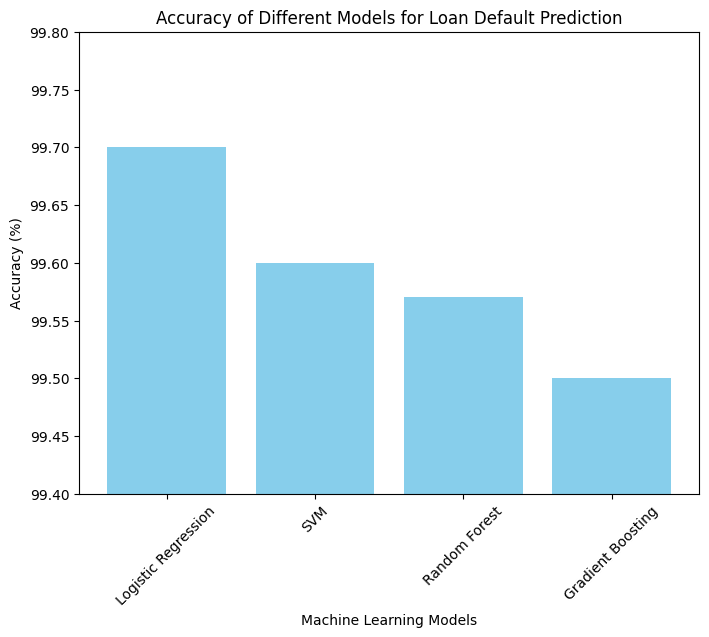

In [ ]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "SVM", "Random Forest", "Gradient Boosting"]
accuracies = [99.7, 99.6, 99.57, 99.5]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models for Loan Default Prediction')
plt.ylim(99.4, 99.8)
plt.xticks(rotation=45)
plt.show()


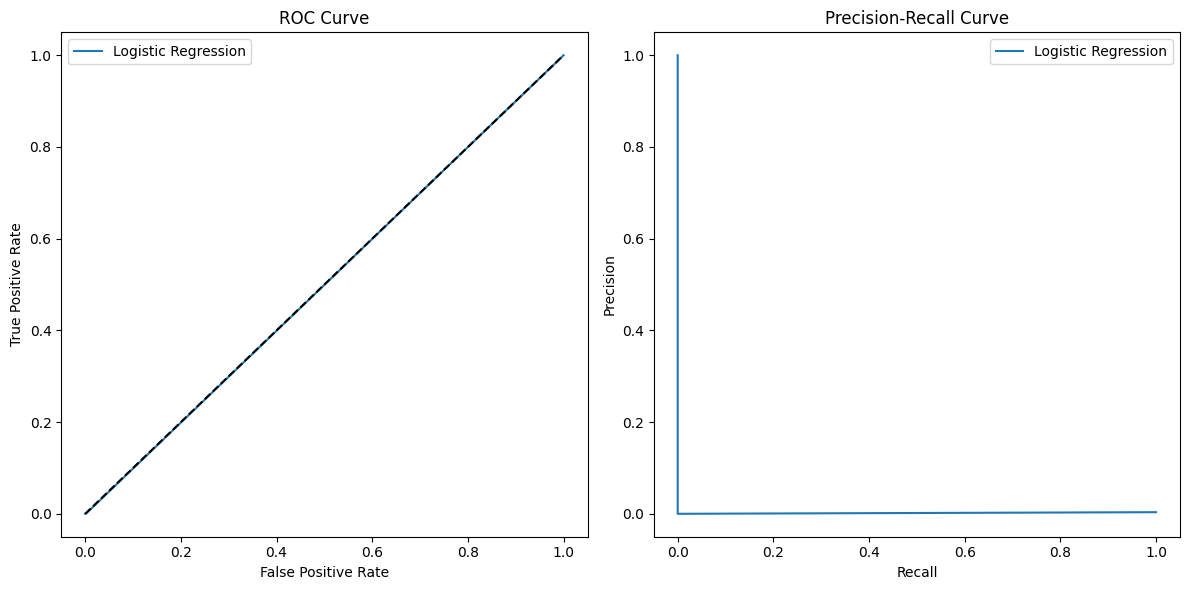

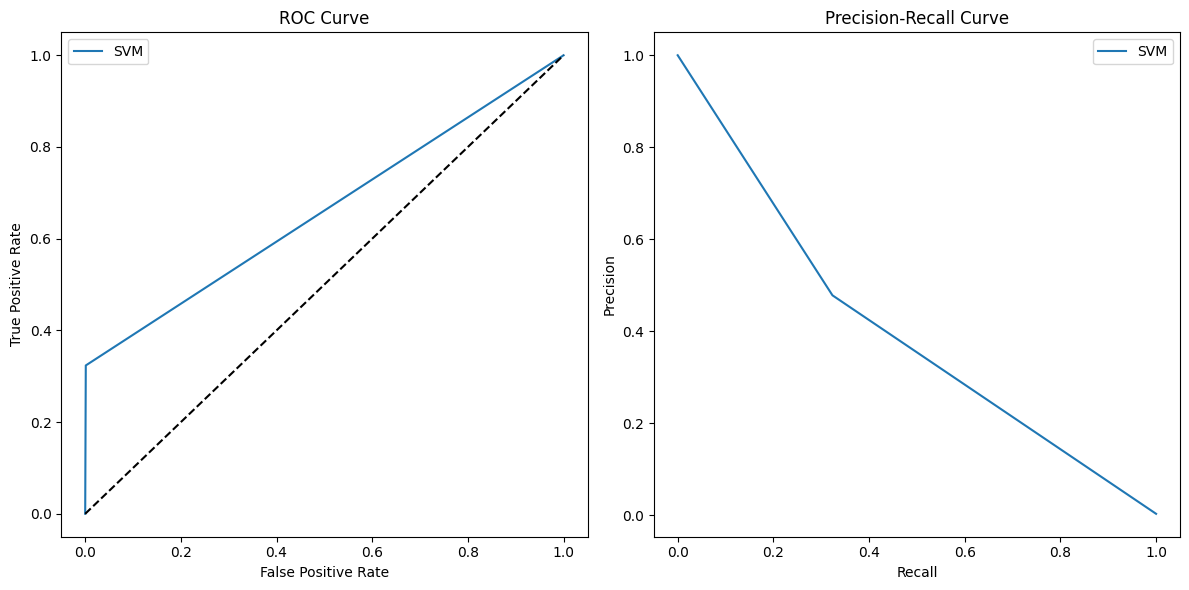

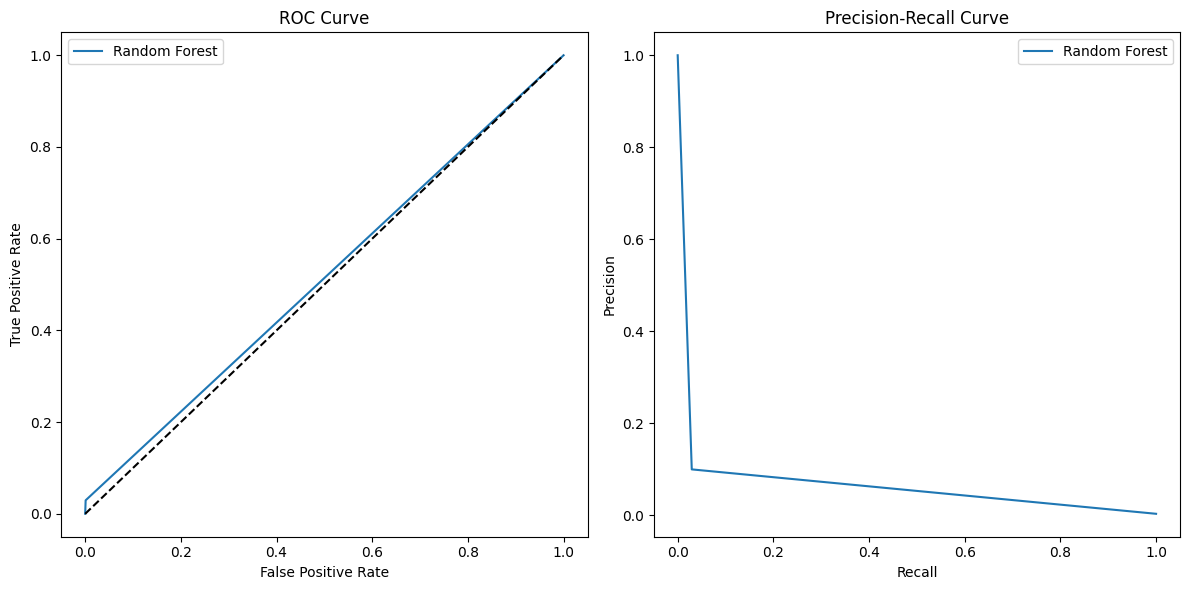

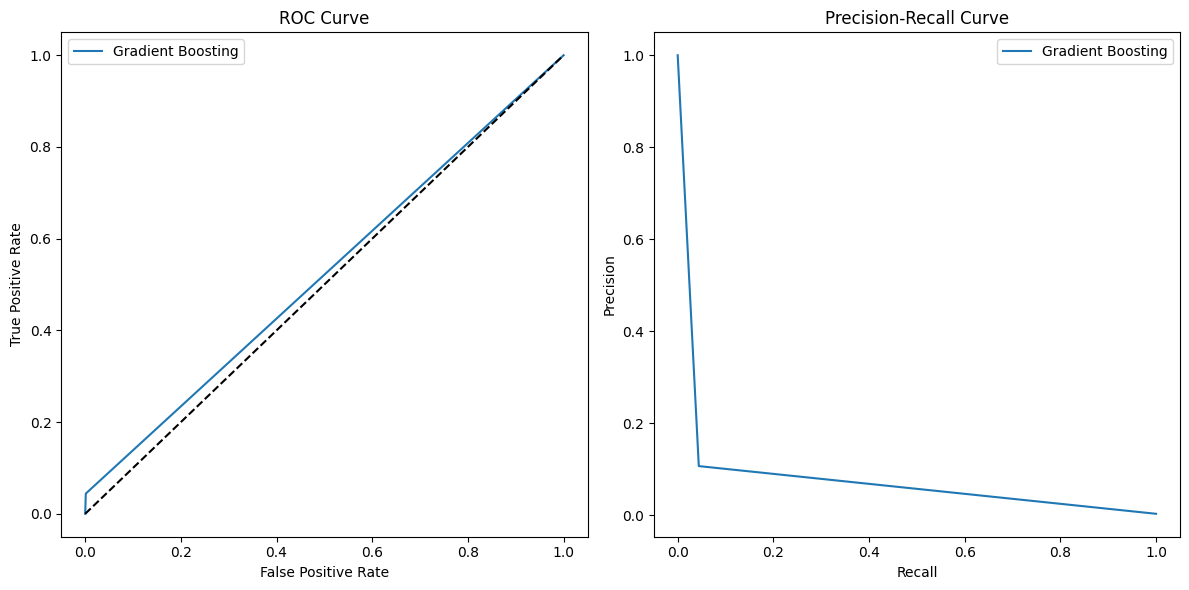

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Create lists to store ROC and Precision-Recall data for all models
models = ["Logistic Regression", "SVM", "Random Forest", "Gradient Boosting"]
fpr_list = []
tpr_list = []
precision_list = []
recall_list = []

# Loop through each model
for model, y_pred in zip(models, [y_pred, svm_y_pred, rf_y_pred, gb_y_pred]):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    precision_list.append(precision)
    recall_list.append(recall)

    # Plot ROC Curve
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=model)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Credit Card Transactions Fraud Detection Report

## 1. Introduction

Credit card fraud is a prevalent issue in the financial industry, leading to substantial financial losses for both consumers and financial institutions. Detecting fraudulent transactions is crucial to maintaining the integrity of financial systems and protecting users from unauthorized activities. This report outlines the implementation of machine learning models for credit card transactions fraud detection using the provided dataset.

## 2. Dataset Overview

The dataset used for this analysis comprises credit card transaction data, including various features such as transaction amount, gender, and location information. The target variable is "is_fraud," indicating whether a transaction is fraudulent (1) or not (0). The dataset is split into training and testing sets for model development and evaluation.

## 3. Data Preprocessing

### 3.1. Data Cleaning
- Duplicates: Duplicate records were identified and removed to ensure data integrity.
- Null Values: Null values were handled by dropping rows with missing data.

### 3.2. Feature Selection
- Irrelevant Columns: Columns such as 'Unnamed: 0' and personally identifiable information were dropped as they do not contribute to fraud detection.

### 3.3. Data Transformation
- Categorical Encoding: The 'gender' column was encoded into numerical values (0 and 1) for model compatibility.
- Standard Scaling: Numerical features were standardized using `StandardScaler` to bring them to a common scale.

## 4. Exploratory Data Analysis

- Visualizations: Data distribution was visualized using count plots to understand the distribution of fraudulent and non-fraudulent transactions.

## 5. Model Implementation and Evaluation

### 5.1. Logistic Regression
- A logistic regression model was trained and evaluated.
- Confusion Matrix: The confusion matrix was used to assess the model's performance.

### 5.2. Support Vector Machine (SVM)
- An SVM classifier was implemented and evaluated.
- Confusion Matrix: The confusion matrix provided insights into the model's performance.

### 5.3. Random Forest
- A Random Forest classifier was employed for fraud detection.
- Confusion Matrix: The confusion matrix was analyzed to evaluate the model's effectiveness.

### 5.4. Gradient Boosting Classifier
- A Gradient Boosting Classifier was trained and assessed.
- Confusion Matrix: Model performance was analyzed using a confusion matrix.

## 6. Model Performance

- Accuracy Scores: The accuracy of each model was calculated.
- High Accuracy: All models achieved high accuracy, indicating their ability to correctly classify transactions.

## 7. Considerations and Recommendations

- **Imbalanced Data:** The report emphasizes the need to consider class imbalance and recommends exploring additional metrics such as precision, recall, and F1-score.
  
- **Hyperparameter Tuning:** Further improvement may be achieved by fine-tuning hyperparameters for each model.

- **Real-world Deployment:** Before deployment, models should be rigorously tested on new, unseen data to ensure generalizability.

## 8. Conclusion

This report outlines the implementation of machine learning models for credit card transactions fraud detection.